In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt



In [ ]:
przepisać równanie ribby
skopiować dane ribby dotyczące chorych

In [1]:
def to_volume(mtd):
    return math.pi * mtd**3/6

In [ ]:

dC/dt = -KDE * C



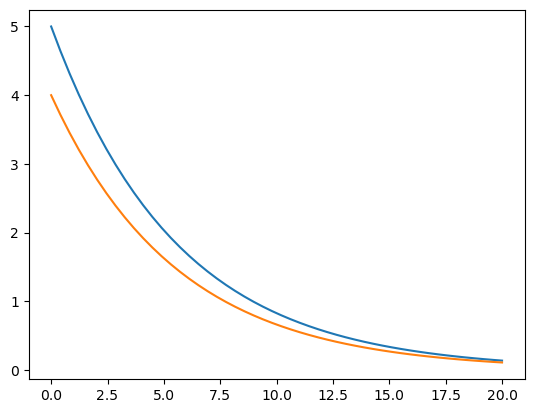

In [57]:
def model(y,t):
    Q_p=y[0]
    z = y[1]
    k = 0.3
    w = k+k
    dQ_pdt = -k * (w)*Q_p
    dzdt = -k * (w)*z

    return [dQ_pdt,dzdt]

y0=5.0
z0=4.0
t = np.linspace(0,20,50)

y = odeint(model,[y0,z0],t)

plt.plot(t,y)

plt.show()



In [3]:
# P proliferative tissue
# P0
# Q0
#lambda_p
# 
# kQPP
#deltaQP  δ
#gamma_q  γ
# gamma_p
#KDE
#C
#K
# k_qpp
# k_pq
# Q_p

"""
P  #proliferative tissue
C  #drug concentration
Q_p = 
Q 
K # fixed maximal tumor size
"""

lambda_p = 0.121 # the rate constant of growth used in the logistic expression for the expansion of proliferative tissue
kQPP = 0.0031 # the rate constant for transfer from damaged quiescent tissue to proliferative tissue,
delta_qp = 0.00867 # rate constant for elimination of the damaged quiescent tissue.
gamma = 0.729
gamma_q  = gamma # damages in proliferative tissue
gamma_p = gamma  # damages in quiescent tissue
KDE = 0.24
k_qpp = 0.0031
k_pq = 0.0295 #(the rate constant for transition from proliferation to quiescence)
K = 100.0 # fixed maximal tumor size 100 mm


def model(P, C, Q_p, Q,t):
    dCdt = -KDE * C
    dPdt = lamdba_p * P*(1 - Pstar/K) + k_qpp * Q_p - k_pq * P - gamma_p * C * KDE * P
    dQdt = k_pq * P - gamma_q * C * KDE * Q
    dQ_pdt = gamma_q * C *KDE * Q - k_qpp * Q_p - delta_qp * Q_p
    Pstar = P + Q + Q_p
    return [dPdt,dQdt]

P0 = 7.13
Q0 = 41.2
C =1.0 #??
Q_p0 = 0.0 # We assumed Q_p0 = 0 when t=0 in the absence of treatment.

t = np.linspace(0,20,50)

y = odeint(model,P0,C,Q_p0,Q0,t)

plt.plot(t,y)

plt.show()


ValueError: diff requires input that is at least one dimensional

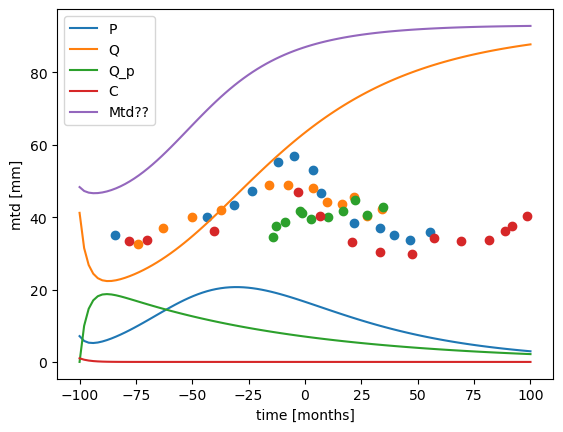

In [25]:


"""
P  #proliferative tissue
C  #drug concentration
Q_p =  damaged quiescent tissue
Q     quiescent tissue
K # fixed maximal tumor size
C  # drug concentration in plasma

1/lambda_p The basic doubling times of the size of the proliferative tissue
"""


def model(y,t):
    lambda_p = 0.121 # the rate constant of growth used in the logistic expression for the expansion of proliferative tissue. Tumor specific
    delta_qp = 0.00867 # rate constant for elimination of the damaged quiescent tissue.
    gamma = 0.729 # Treatment specific
    gamma_q  = gamma # damages in proliferative tissue. Treatment specific
    gamma_p = gamma  # damages in quiescent tissue. Treatment specific
    KDE = 0.24 # KDE is the rate constant for the decay of the PCV concentration in plasma, denoted C.
    k_qpp = 0.0031 # the rate constant for transfer from damaged quiescent tissue to proliferative tissue,
    k_pq = 0.0295 # the rate constant for transition from proliferation to quiescence. Tumor specific
    K = 100.0 # fixed maximal tumor size 100 mm
    
    [P,Q, Q_p, C] = y

    dCdt = -KDE * C
    dPdt = lambda_p * P*(1 - (P + Q + Q_p)/K) + k_qpp * Q_p - k_pq * P - gamma_p * C * KDE * P
    dQdt = k_pq * P - gamma_q * C * KDE * Q
    dQ_pdt = gamma_q * C *KDE * Q - k_qpp * Q_p - delta_qp * Q_p
    return [dPdt,dQdt,dQ_pdt,dCdt]

P0 = 7.13
Q0 = 41.2
Q_p0 = 0.0 # We assumed Q_p0 = 0 when t=0 in the absence of treatment.
C =1.0 #??

t = np.linspace(-100,100,100)

y = odeint(model,[P0,Q0,Q_p0,C],t)

# print(y)
plt.plot(t,y[:,0],label="P")
plt.plot(t,y[:,1],label="Q")
plt.plot(t,y[:,2],label="Q_p")
plt.plot(t,y[:,3],label="C")
plt.plot(t,y[:,0]+y[:,1]+y[:,2],label="Mtd??")

plt.legend(loc="upper left")


patient = df[df.id ==0]
plt.scatter(patient.t,patient.mtd)
patient = df[df.id ==1]
plt.scatter(patient.t,patient.mtd)
patient = df[df.id ==2]
plt.scatter(patient.t,patient.mtd)
patient = df[df.id ==3]
plt.scatter(patient.t,patient.mtd)
plt.xlabel("time [months]")
plt.ylabel("mtd [mm]")

plt.show()


In [27]:
print(y[:,0])

[ 7.13        5.80184735  5.31258028  5.22617446  5.36589083  5.64843953
  6.02976841  6.48439156  6.99644109  7.55534132  8.15350575  8.78500981
  9.44478041 10.12808482 10.83020773 11.54625562 12.27105285 12.9991071
 13.72462903 14.44159438 15.14383883 15.82517636 16.47953206 17.10108078
 17.6843828  18.22450915 18.71714964 19.1586987  19.54631544 19.87795654
 20.15238192 20.36913674 20.52850751 20.63146451 20.67958833 20.67498714
 20.62020955 20.51815636 20.37199476 20.18507728 19.96086751 19.70287405
 19.41459297 19.09945923 18.76080686 18.40183724 18.02559501 17.63495063
 17.232589   16.82100293 16.40249101 15.97915879 15.55292279 15.12551649
 14.6984983  14.27326053 13.85103877 13.43292214 13.01986347 12.61268955
 12.21211171 11.81873458 11.4330661  11.05552628 10.68645552 10.32612261
  9.9747321   9.63243073  9.29931417  8.97543255  8.66079595  8.35537913
  8.05912596  7.77195348  7.49375552  7.224406    6.96376192  6.711666
  6.46794891  6.23243171  6.00492782  5.78524441  5.57

In [6]:
import pandas as pd

df =  pd.read_csv('data/fig1_mtd_pcv_00.csv',names = ['t','mtd','id'],header=None)


In [13]:
df

,t,mtd,id
0,-84.080717,35.106383,0
1,-43.273543,39.969605,0
2,-31.614350,43.465046,0
3,-23.542601,47.112462,0
4,-12.107623,55.167173,0
5,-4.708520,56.838906,0
6,3.363229,53.039514,0
7,7.174888,46.656535,0
8,21.524664,38.297872,0
9,33.408072,36.930091,0
